In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

             High   Low  Open  Close    Volume  Adj Close    100ma
Date                                                              
2022-12-08  1.450  1.28  1.31   1.32  12824500       1.32  3.46465
2022-12-09  1.355  1.25  1.30   1.30  16065900       1.30  3.42105
2022-12-12  1.475  1.28  1.31   1.45  20003200       1.45  3.37945
2022-12-13  1.750  1.43  1.64   1.53  50029700       1.53  3.34305
2022-12-14  1.610  1.43  1.47   1.52  18632500       1.52  3.30885


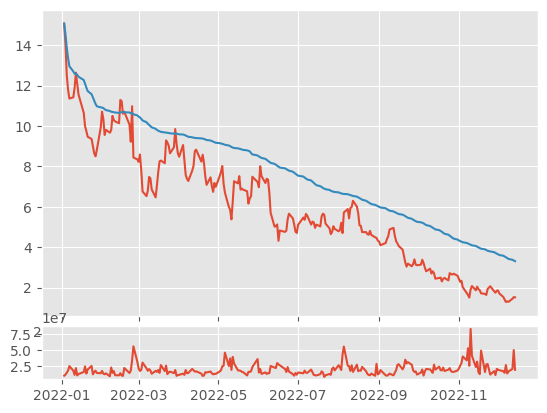

In [24]:
# style.use('ggplot')

# start = dt.datetime(2022, 1,1)
# end = dt.datetime(2022,12,14)

# df = web.DataReader('OPEN', 'yahoo', start, end)
# print(df.tail(6))

# df.to_csv('open.csv')

df = pd.read_csv('open.csv', parse_dates=True, index_col=0 )
# print(df[['Open', 'High']].tail())
# df['Adj Close'].plot()

df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.tail())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['Volume'])

plt.show()